# Chapter 3: Adding Layers

NNs becomes “deep” when they have 2 or more hidden layers.

We don’t necessarily deal with layers between the input and output layers, thus called “hidden”.

<center><img src='.\image\3-1.png' style='width: 60%'/></center>

3 neurons in the hidden layer has 3 sets of weights, each set has 4 weights corresponding to 4 inputs.
Thus, our initial weights have a shape of (3, 4).

To add a new hidden layer, we can have as many weight sets as we want (as many neurons), but each of those weight sets must have 3 discrete weights.

<center><img src='.\image\3-2.png' style='width: 60%'/></center>

In [1]:
import numpy as np
inputs = [[1, 2, 3, 2.5], [2., 5., -1., 2], [-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1], [0.5, -0.91, 0.26, -0.5], [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]
weights2 = [[0.1, -0.14, 0.5], [-0.5, 0.12, -0.33], [-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]
layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


## 3.1. Training Data

Linear data can be fit with or represented by a straight line.

<center><img src='.\image\3-2.png' style='width: 60%'/><font color='gray'><i>Example of data (orange dots) that can be represented (fit) by a straight line (green line).</i></font></center>

Non-linear data cannot be represented well by a straight line (linear regressor)

<center><img src='.\image\3-3.png' style='width: 60%'/><font color='gray'><i>Example of data (orange dots) that can be represented (fit) by a straight line (green line).</i></font></center>

We can generate data for studying using `nnfs` package. In practice, you have your own dataset. 

In [2]:
!pip install nnfs

from nnfs.datasets import spiral_data
import numpy as np
import nnfs

nnfs.init()

`nnfs.init()` does three things to ensure repeatable results:
- Set random seed to 0 (by default)
- Create a float32 dtype default
- Override the original dot product from NumPy

`spiral_data` allows us to create a dataset with as many classes as we want.

In [3]:
!pip install matplotlib

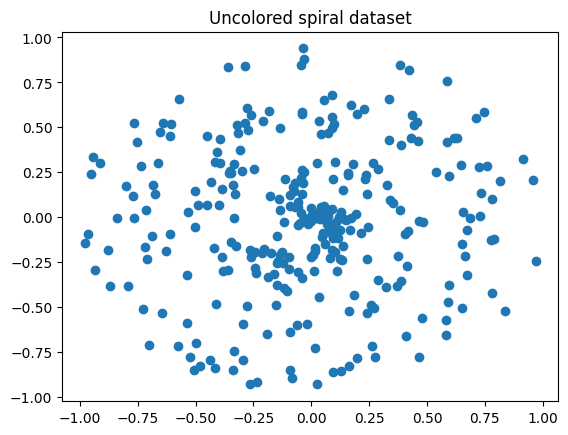

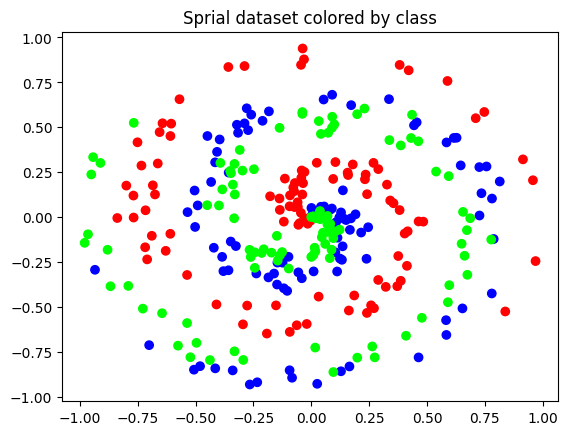

In [4]:
import matplotlib.pyplot as plt
X, y = spiral_data(samples = 100 , classes = 3)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Uncolored spiral dataset')
plt.show()
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'brg')
plt.title('Sprial dataset colored by class')
plt.show()

NNs will not be aware of color differences as the data have no class encodings.

This is only made as an instruction for the reader.

Each dot is the feature, and its coordinates are the samples that form the dataset.

These colors would then be assigned a class number for the model to fit to, like 0, 1, and 2.

## 3.2. Dense Layer Class

Dense layers = fully-connected or “fc”.

NNs work best wit values between -1 and +1 (Gaussian distribution of mean 0 and variance 1).

In [5]:
class Layer_Dense :
    
    # Layer initialization
    def __init__ ( self , n_inputs , n_neurons ):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros(( 1 , n_neurons))
        
    # Forward pass
    def forward ( self , inputs ):
        self.output = np.dot(inputs, self.weights) + self.biases

Multiply the Gaussian distribution for the weights by 0.01 to reduce time the model take to fit the data.

Otherwise, starting values will be disproportionately large compared to the updates being made during training.

Should set initial biases to 0 because some activation function (i.e., a step function) y jumps at x=0

In [6]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

# Dense layer
class Layer_Dense:
    
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    # Forward pass
    def forward(self, inputs):
        
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Let's see output of the first few samples:
print(dense1.output[:3])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]]
